In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def noise(data):
    noise = np.random.normal(0, np.abs(0.01 * data), size=data.shape)#noise=0; 0.01; 0.005; 0.0025
    noisy_data = data + noise
    return noisy_data

(32, 32)


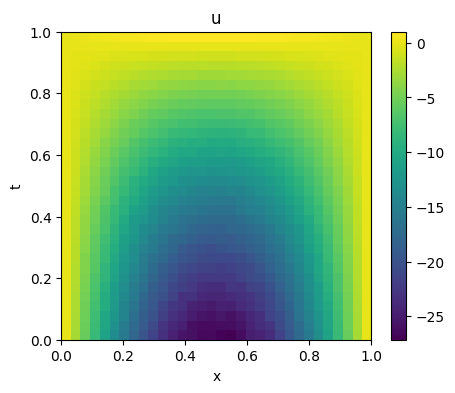

In [35]:
L = 1    
T = 1          
Nx = 32          
Nt = 32          
c = 0.25     

dx = L / (Nx - 1)
dt = T / (Nt - 1)

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

u = np.zeros((Nt, Nx))

# Начальные условия
u[0, :] = np.sin(np.pi * x)  # Начальное смещение
u[1, :] = 0.0            # Начальное значение скорости (нулевое)

# Граничные условия (нулевые)
u[:, 0] = 0.0
u[:, -1] = 0.0

for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = (2 * u[n, i] - u[n - 1, i] +
                       (c * dt / dx) ** 2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]))

u = noise(u)
print(u.shape)
plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('u')
plt.xlabel('x')
plt.ylabel('t')
plt.show()



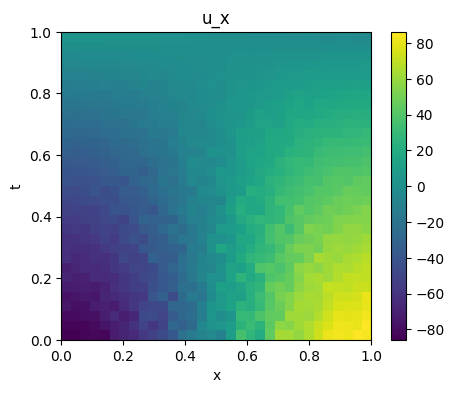

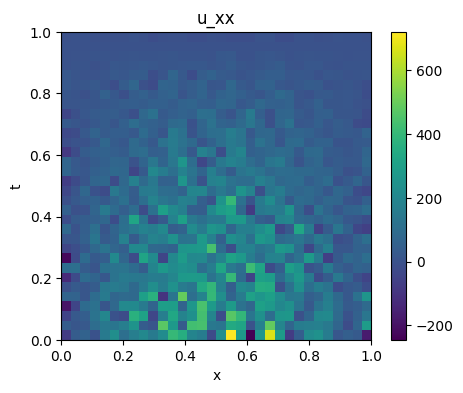

In [36]:
u_x = np.gradient(u, dx, axis=1, edge_order=2)# по x

u_xx = np.gradient(u_x, dx, axis=1, edge_order=2)# по x

plt.figure(figsize=(5, 4))
plt.imshow(u_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('u_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('u_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


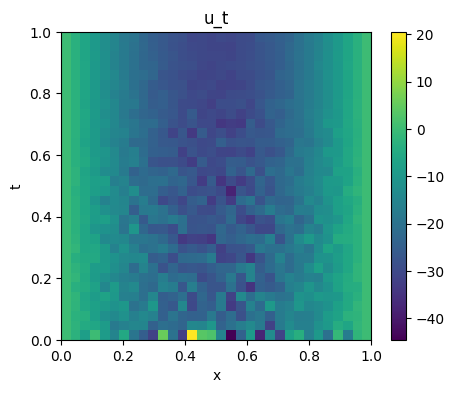

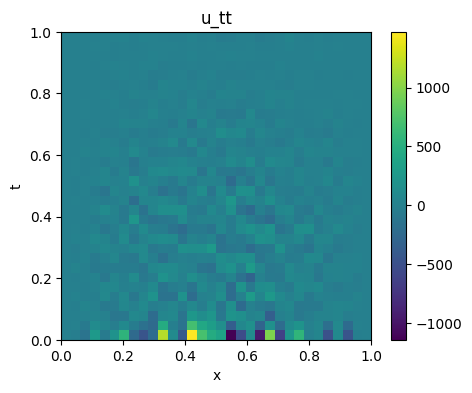

In [37]:
u_t = np.gradient(u, dt, axis=0, edge_order=2)# по t

u_tt = np.gradient(u_t, dt, axis=0, edge_order=2)# по t

plt.figure(figsize=(5, 4))
plt.imshow(u_t, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('u_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u_tt, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('u_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


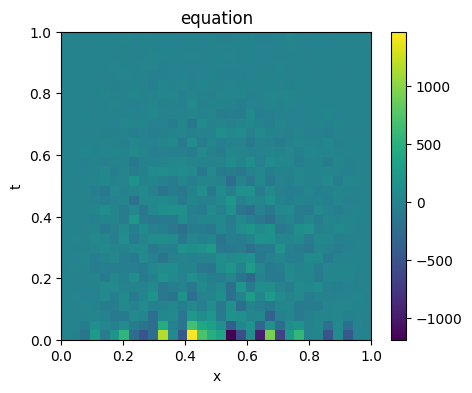

In [38]:
#проверка
u1 = u_tt - c**2 * u_xx

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('equation')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [39]:
np.save('data_wave_noise0.01.npy', u)

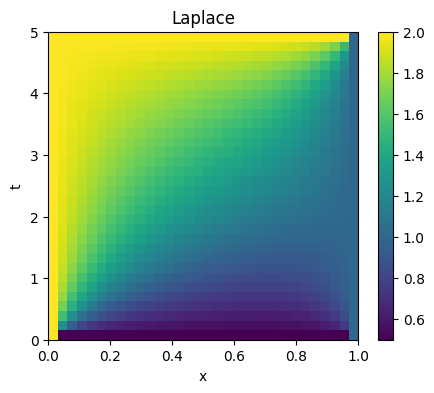

In [19]:
#уравнение Лапласа с граничными условиями 
def laplace_equation_solver(grid_size=32, tolerance=1e-4):
    u = np.zeros((grid_size, grid_size))
    
    u[0,:] = 2
    u[-1,:] = 0.5
    u[:,0] = 2
    u[:,-1] = 1
    
    converged = False
    while not converged:
        previous_u = np.copy(u)

        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                u[i,j] = 0.25 * (u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1])
        #гран условия
        u[0,:] = 2
        u[-1,:] = 0.5
        u[:,0] = 2
        u[:,-1] = 1
        if np.max(np.abs(u - previous_u)) < tolerance:
            converged = True
    
    return u

u = laplace_equation_solver()

u = noise(u)
x = np.linspace(0, 1, 32)
y = np.linspace(0, 1, 32)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Laplace')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [20]:
np.save('data_laplace_noise0.npy', u)

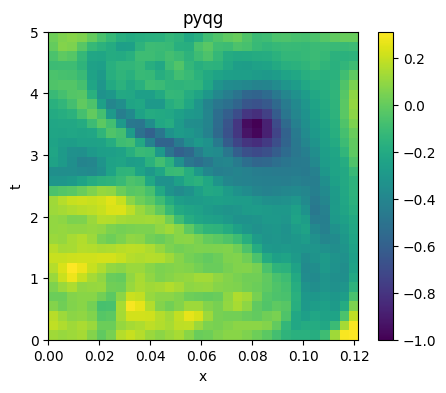

In [21]:
u = np.load('data_pyqg.npy')
x = np.load('x.npy')
y = np.load('y.npy')

u = noise(u)

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('pyqg')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [22]:
np.save('data_pyqg_noise0.npy', u)